# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import json 
from timeit import default_timer as timer 
import tweepy 
from tweepy import OAuthHandler 
import os
import config
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [4]:
tsv_df = pd.read_table('image_predictions.tsv')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [6]:
tweet_ids = archive_df.tweet_id.values

In [7]:
auth = tweepy.OAuthHandler(config.consumer_key, config.consumer_secret)
auth.set_access_token(config.access_token, config.access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [8]:
for tweet_id in tweet_ids:
    # the .get_status() method of the API helps get all the information about the tweet specified
    tweet = api.get_status(tweet_id, tweet_mode='extended')
    print(tweet)
    break

Status(_api=<tweepy.api.API object at 0x0000022EEBF37AF0>, _json={'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 

In [9]:
for tweet_id in tweet_ids:
    tweet = api.get_status(tweet_id, tweet_mode='extended')
    # this next line helps us get the attributes in the python object returned
    print(f'The attributes in this python object are: {dir(tweet)}')
    break

The attributes in this python object are: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']


In [10]:
print(type(tweet._json))
print(tweet._json)

<class 'dict'>
{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_ent

In [11]:
# open the text file in write mode
with open('sample.txt','w') as outfile:
    # use the json.dump() method to write the json content to the file
    json.dump(tweet._json, outfile)

In [12]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive

# initialize a counter to help track progress
count = 0

# create a dictionary to store the tweet ids that cannot be retrieved
fails_dict = {}

# start tracking the time taken to run the next lines of code
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file

# open the text file in write mode
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        # increment the counter with each tweet that's being queried
        count += 1
        # print the number and tweet id
        print(str(count) + ": " + str(tweet_id))
        try:
            # get the status of the tweet
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            # write the json data to the text file opened
            json.dump(tweet._json, outfile)
            # you're required to write each tweet on a new line so go to a new line
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            # write the tweet id that failed along with the error message to the fails_dict dictionary
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 325


Success
900: 758828659922702336
Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success


Success
1152: 725842289046749185
Success
1153: 725786712245440512
Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
11

Success
1401: 699446877801091073
Success
1402: 699434518667751424
Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
14

Success
1650: 683742671509258241
Success
1651: 683515932363329536
Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
16

Rate limit reached. Sleeping for: 334


Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
18

Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
20

Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
23

In [13]:
fails_dict

{888202515573088257: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 873697596434513921: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 872668790621863937: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 872261713294495745: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 869988702071779329: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 866816280283807744: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 861769973181624320: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 856602993587888130: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 856330835276025856: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 851953902622658560: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 851861385

In [14]:
len(fails_dict)

29

In [15]:
# read the data into a dataframe using pd.read_json
df = pd.read_json('tweet_json.txt', lines = True)
df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [16]:
df = df[['id','created_at','retweet_count','favorite_count']]
df.rename(columns = {'id':'tweet_id'}, inplace = True)
df

,tweet_id,created_at,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,6989,33771
1,892177421306343426,2017-08-01 00:17:27+00:00,5291,29294
2,891815181378084864,2017-07-31 00:18:03+00:00,3470,22028
3,891689557279858688,2017-07-30 15:58:51+00:00,7214,36887
4,891327558926688256,2017-07-29 16:00:24+00:00,7741,35260
...,...,...,...,...
2322,666049248165822465,2015-11-16 00:24:50+00:00,36,88
2323,666044226329800704,2015-11-16 00:04:52+00:00,115,247
2324,666033412701032449,2015-11-15 23:21:54+00:00,36,100
2325,666029285002620928,2015-11-15 23:05:30+00:00,39,112


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Visual assessment

In [17]:
archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
archive_df.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


#### Programmatic assessment

In [19]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [22]:
a = archive_df.tweet_id.isin(archive_df.in_reply_to_status_id)

In [23]:
archive_df[a]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
192,855818117272018944,NaN,NaN,2017-04-22 16:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,NaN,NaN,NaN,https://twitter.com/markhalperin/status/855656...,13,10,None,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
235,847606175596138505,NaN,NaN,2017-03-31 00:27:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cannon. He just heard something behind...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847606175...,12,10,Cannon,None,None,None,None
388,826598365270007810,NaN,NaN,2017-02-01 01:09:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pawnd... James Pawnd. He's suave af. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826598365...,13,10,Pawnd,None,None,None,None
499,813127251579564032,NaN,NaN,2016-12-25 21:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's an anonymous doggo that appears to be v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813127251...,11,10,None,doggo,None,None,None
514,811627233043480576,NaN,NaN,2016-12-21 17:39:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Augie. He's a savage. Doesn't give a h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811627233...,10,10,Augie,None,None,None,None
896,759099523532779520,NaN,NaN,2016-07-29 18:53:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He has a drinking problem. Inflatab...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759099523...,7,10,Toby,None,None,None,None
1006,747648653817413632,NaN,NaN,2016-06-28 04:31:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Keurig. He apparently headbutts other ...,NaN,NaN,NaN,https://vine.co/v/iqIZFtOxEMB,12,10,Keurig,None,None,None,None
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
1130,729113531270991872,NaN,NaN,2016-05-08 00:59:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge accepted""\n10/10 https://t.co/vNjvr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729113531...,10,10,None,None,None,None,None


In [24]:
with pd.option_context('max_colwidth',2000):
    display(archive_df.query('rating_denominator < 10'))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


In [25]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [26]:
archive_df.query('rating_denominator < 10 | rating_denominator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [27]:
archive_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

<AxesSubplot:>

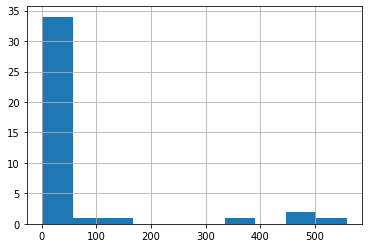

In [28]:
archive_df.rating_numerator.value_counts().hist()

In [29]:
(archive_df.name.value_counts().tail(10))

Corey         1
Leonard       1
Beckham       1
Devón         1
Gert          1
Dex           1
Ace           1
Tayzie        1
Grizzie       1
Christoper    1
Name: name, dtype: int64

In [30]:
with pd.option_context('max_colwidth',2000):
    display(archive_df[(archive_df.name  == 'None')])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100786774016/photo/1,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193221509120/photo/1,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None


In [31]:
df.head(2)

,tweet_id,created_at,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,6989,33771
1,892177421306343426,2017-08-01 00:17:27+00:00,5291,29294


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2327 non-null   int64              
 1   created_at      2327 non-null   datetime64[ns, UTC]
 2   retweet_count   2327 non-null   int64              
 3   favorite_count  2327 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 72.8 KB


In [33]:
df.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2466.040395,7044.211001
std,6.820795e+16,4176.131913,10946.771368
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,493.500000,1222.500000
50%,7.178418e+17,1148.000000,3048.000000
75%,7.986547e+17,2854.500000,8589.500000
max,8.924206e+17,70569.000000,144667.000000


In [34]:
df.isnull().sum()

tweet_id          0
created_at        0
retweet_count     0
favorite_count    0
dtype: int64

In [35]:
tsv_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [36]:
tsv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
tsv_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Quality issues
1. The archive source will be separated from the column url link 

2. The text column is mixed with the tweet url in the archive

3. Rearrangement of the column names
4. The data type for the tweet id column in the archive data is wrong

5. The data type for timestamp tweet archive is wrong

6. Some tweets are not original tweets but are retweet and replies also the columns that holds no important information will be removed   
7. The dog names are not totally correct names starting with lowercases are wrong names and would be replaced
8. One confidence is enough in the tsv_df so others will be dropped
9. Duplicate columns in the three dataframe

### Tidiness issues
1. The denominator column is not needed since its a known value
2. The dog stages should be together in a column
3. Duplicate columns in the three dataframe so they will be merged

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [38]:
# Make copies of original data
archive_df_clean = archive_df.copy()
df_clean = df.copy()
tsv_df_clean = tsv_df.copy()

### Issue #1: The source column in the archive table will be separated from the url link

#### Define: The source column contains url of the origin of the tweet in relation to what device the tweet was made from which needs to be separated

#### Code

In [39]:
archive_df_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [40]:
archive_df_clean['source'] = archive_df_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [41]:
archive_df_clean.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2356, dtype: object

### Issue #2: Separating text from url in the text column of archive_df table

#### Define The text column is mixed with the tweet url in the archive and wil be separated using regex

#### Code

In [42]:
archive_df_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [43]:
# replace the url with empty "" using regex
archive_df_clean['text'] = archive_df_clean.text.apply(lambda x : re.sub('http\S+','', x).strip())

# Replace &amp with &
archive_df_clean['text'] = archive_df_clean.text.str.replace("&amp;", "&")

# Replace \n with ' '
archive_df_clean['text'] = archive_df_clean.text.str.replace("\n", " ")

#### Test

In [44]:
archive_df_clean[['tweet_id', 'text']].head(2)

,tweet_id,text
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,This is Tilly. She's just checking pup on you....


### Issue #3: Rearrange the id column for tsv_df

#### Define: The column is arranged ascendingly which does not match other dataframes

#### Code

In [45]:
tsv_df_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [46]:
tsv_df_clean.sort_values('tweet_id', axis = 0, ascending = False, inplace = True)

In [47]:
tsv_df_clean.reset_index(drop = True, inplace = True)

#### Test

In [48]:
tsv_df_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Issue #4: Change the tweet id column data type to string for all the dataframes

#### Define: The data type for the tweet id columns should be a string since the id is not meant to be used as an integer

#### Code

In [49]:
archive_df_clean['tweet_id'] = archive_df_clean['tweet_id'].astype(str)
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
tsv_df_clean['tweet_id'] = tsv_df_clean['tweet_id'].astype(str)

#### Test

In [50]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [51]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2327 non-null   object             
 1   created_at      2327 non-null   datetime64[ns, UTC]
 2   retweet_count   2327 non-null   int64              
 3   favorite_count  2327 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 72.8+ KB


In [52]:
tsv_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #5: Wrong data type timestamp column in archive_df dataframe

#### Define: The datatype of the timestamp column is showing as an object instead of datetime format

#### Code

In [53]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [54]:
archive_df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [55]:
from datetime import datetime
archive_df_clean['timestamp'] = pd.to_datetime(archive_df_clean.timestamp)
archive_df_clean['timestamp'] = archive_df_clean.timestamp.dt.floor('s')

#### Test

In [56]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #6: Some tweets are not original tweets but are retweet and replies also the column that holds no important information will be removed 

#### Define: Tweets that are retweets and replies sre removed also the column that holds no information about the retweet will be removed from the archive datafram which includes: n_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp using the drop function

#### Code

In [57]:
archive_df_clean = archive_df_clean[(archive_df_clean['in_reply_to_status_id'].isna() == True)  & (archive_df_clean['retweeted_status_id'].isna() == True)]

In [58]:
archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [59]:
archive_df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Issue #7: Replacing wrong dog names

#### Define: There are names like a, an, his and other words which are not names they mostly start with lower cases so they will be replaced with 'Unknown' instead

#### Code

In [60]:
archive_df_clean.name = archive_df_clean.name.apply(lambda x : 'Unknown' if x[0].islower() else x)

#### Test

In [61]:
#To see if they were successfully removed
assert archive_df_clean.name.apply(lambda x : x[0].isupper()).all()

### Issue #8: Selecting a confidence and Breed column

#### Define: There are three columns of breed and confidence available the breed with the highest confidence level is selected. The columns that are not needed are then dropped

#### Code

In [62]:
# empty list for new row is created
breed = []
confidence = []

# iterating through every row to get the best confidence and breed.
def bre_con(row):
    if row.p1_dog == True:
        breed.append(row.p1)
        confidence.append(row.p1_conf)
    elif row.p2_dog == True:
        breed.append(row.p2)
        confidence.append(row.p2_conf)
    elif row.p3_dog == True:
        breed.append(row.p3)
        confidence.append(row.p3_conf)
    else:
        breed.append('Unpredicted')
        confidence.append(0)
        
tsv_df_clean.apply(bre_con, axis=1)

# add lists created to master dataframe
tsv_df_clean['breed'] = breed
tsv_df_clean['confidence'] = confidence 

In [63]:
columns_to_drop = ['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

tsv_df_clean.drop(columns = ['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

#### Test

In [64]:
# assert tsv_df_clean.columns.any() not in columns_to_drop

In [65]:
tsv_df_clean.head(10)

,tweet_id,jpg_url,breed,confidence
0,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unpredicted,0.000000
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
5,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703
7,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142
8,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574
9,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319


### Issue #9: Change the column name in df dataframe to a matching column name in archive_df

#### Define: For the column to be successfully matched they should have matching column names so the created_at column name should be changed to timestamp instead

#### Code

In [66]:
df_clean.head(2)

,tweet_id,created_at,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,6989,33771
1,892177421306343426,2017-08-01 00:17:27+00:00,5291,29294


In [67]:
df_clean.rename(columns = {'created_at':'timestamp'}, inplace = True)

### Tidiness
### Issue #9: Drop the denominator column

#### Define: Since the denominator is already a known figure the column is best removed as it doesn't hold any significant information

#### Code

In [68]:
archive_df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [69]:
archive_df_clean.drop('rating_denominator', axis = 1, inplace = True)

#### Test

In [70]:
archive_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #10: The dog stages is spread across 4 coulumns

#### Define: The stages should be in a single column and this will be done by melting it

#### Code

In [71]:
archive_df_clean['dog_stage'] = archive_df_clean['text'].str.extract('(doggo|floofer|pupper|puppo|None)')

In [72]:
archive_df_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#### Test

In [73]:
archive_df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN


### Issue #11: Duplicate columns in the three dataframe

#### Define: To remove the duplicates the three dataframe will be merged together

#### Code

In [74]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2097 non-null   object             
 1   timestamp         2097 non-null   datetime64[ns, UTC]
 2   source            2097 non-null   object             
 3   text              2097 non-null   object             
 4   expanded_urls     2094 non-null   object             
 5   rating_numerator  2097 non-null   int64              
 6   name              2097 non-null   object             
 7   dog_stage         355 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(1), object(6)
memory usage: 147.4+ KB


In [75]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2327 non-null   object             
 1   timestamp       2327 non-null   datetime64[ns, UTC]
 2   retweet_count   2327 non-null   int64              
 3   favorite_count  2327 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 72.8+ KB


In [76]:
tsv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [77]:
archive_df_clean = pd.merge(archive_df_clean, df_clean, 
                         on = ['tweet_id', 'timestamp'], how = 'left')

In [78]:
archive_df_clean = pd.merge(archive_df_clean, tsv_df_clean, 
                         on = 'tweet_id', how = 'left')

#### Test

In [79]:
archive_df_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN,6989.0,33771.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unpredicted,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,5291.0,29294.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,3470.0,22028.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN,7214.0,36887.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,7741.0,35260.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [80]:
archive_df_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [81]:
werate_dogs = archive_df_clean.copy()

In [82]:
werate_dogs.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN,6989.0,33771.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unpredicted,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,5291.0,29294.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,3470.0,22028.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN,7214.0,36887.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,7741.0,35260.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


#### Insights
1. Dog breed with the most number of likes
2. The most tweeted dog breed by retweets counts which could suggest that it's popular among humans
3. Highest rating and for which dog stage
4. Most popular name of Dog by number of tweet

<AxesSubplot:>

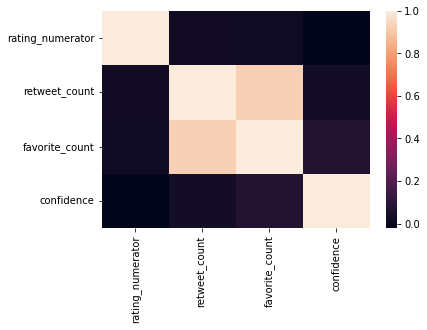

In [84]:
#visualizing the correlation of the data
import seaborn as sns
sns.heatmap(werate_dogs.corr())

In [85]:
werate_dogs.breed.value_counts().head(20)

Unpredicted                  305
golden_retriever             156
Labrador_retriever           106
Pembroke                      94
Chihuahua                     90
pug                           62
toy_poodle                    50
chow                          48
Samoyed                       42
Pomeranian                    41
malamute                      33
Chesapeake_Bay_retriever      31
French_bulldog                31
cocker_spaniel                30
miniature_pinscher            24
Eskimo_dog                    22
German_shepherd               21
Cardigan                      21
Staffordshire_bullterrier     20
Siberian_husky                20
Name: breed, dtype: int64

In [86]:
#analysing the favourite dogs by favourite count of tweet
fav_breed = werate_dogs[werate_dogs.breed != 'Unpredicted']
fav_breed = fav_breed.groupby(['breed']).favorite_count.sum().sort_values(ascending = False)
top20_breeds_fav = fav_breed.head(20)
top20_breeds_fav

breed
golden_retriever            1683243.0
Labrador_retriever          1029785.0
Pembroke                     904001.0
Chihuahua                    665955.0
French_bulldog               525442.0
Samoyed                      481395.0
chow                         388991.0
cocker_spaniel               351699.0
pug                          324896.0
malamute                     304335.0
toy_poodle                   274453.0
Pomeranian                   274371.0
Chesapeake_Bay_retriever     265531.0
Eskimo_dog                   243066.0
Cardigan                     229360.0
German_shepherd              184953.0
Lakeland_terrier             183125.0
basset                       171196.0
miniature_pinscher           168704.0
Great_Pyrenees               157273.0
Name: favorite_count, dtype: float64

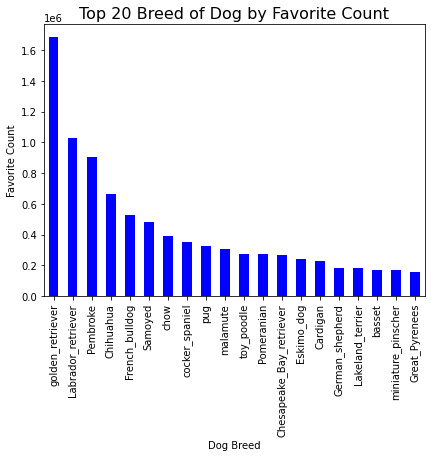

In [101]:
#plotting the top 20
plt.subplot(1,2,2)
top20_breeds_fav.nlargest(20).plot(kind='bar', color=['blue'], figsize=(15,5))
plt.title('Top 20 Breed of Dog by Favorite Count', fontsize=16)
plt.xlabel('Dog Breed')
plt.ylabel('Favorite Count');

In [88]:
ret_breed = werate_dogs[werate_dogs.breed != 'Unpredicted']
ret_breed = ret_breed.groupby(['breed']).retweet_count.sum().sort_values(ascending = False)
ret_breeds_counts = ret_breed.head(20)
ret_breeds_counts

breed
golden_retriever            475622.0
Labrador_retriever          311140.0
Pembroke                    236184.0
Chihuahua                   209574.0
Samoyed                     155710.0
French_bulldog              131925.0
cocker_spaniel              118530.0
chow                        106968.0
pug                          94232.0
Pomeranian                   91144.0
toy_poodle                   89088.0
malamute                     88338.0
Eskimo_dog                   85159.0
Chesapeake_Bay_retriever     67307.0
Cardigan                     63746.0
Lakeland_terrier             59011.0
Great_Pyrenees               53896.0
standard_poodle              49271.0
whippet                      45120.0
German_shepherd              44946.0
Name: retweet_count, dtype: float64

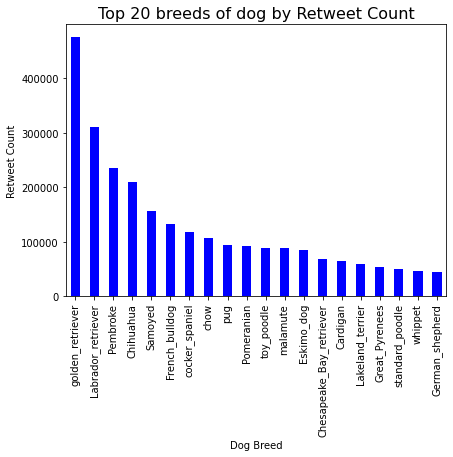

In [103]:
# Plotting the top 20 response for retweet
plt.subplot(1,2,1)
ret_breeds_counts.nlargest(20).plot(kind='bar', color=['blue'], figsize=(15,5))
plt.title('Top 20 breeds of dog by Retweet Count', fontsize=16)
plt.xlabel('Dog Breed')
plt.ylabel('Retweet Count');

In [90]:
werate_dogs.dog_stage.value_counts()

pupper     240
doggo       80
puppo       29
floofer      4
None         2
Name: dog_stage, dtype: int64

In [91]:
#the number of none is not complete
werate = werate_dogs.dog_stage.isnull().sum()
werate

1742

In [92]:
werate_dogs.dog_stage.fillna('None', inplace = True, axis = 0)
werate

1742

In [93]:
werate_dogs.dog_stage.value_counts()

None       1744
pupper      240
doggo        80
puppo        29
floofer       4
Name: dog_stage, dtype: int64

In [94]:
we_stage = werate_dogs.query('dog_stage != "None"')
dog_rate  = (we_stage.groupby(['dog_stage']).rating_numerator.sum()).sort_values(ascending = False)
dog_rate

dog_stage
pupper     2965
doggo      1123
puppo       352
floofer      49
Name: rating_numerator, dtype: int64

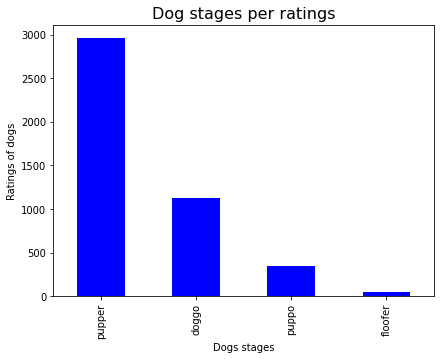

In [95]:
plt.subplot(1,2,1)
dog_rate.plot(kind='bar', color=['blue'], figsize=(15,5))
plt.title('Dog stages per ratings', fontsize=16)
plt.xlabel('Dogs stages')
plt.ylabel('Ratings of dogs');

In [96]:
werate_dogs.name.value_counts().head(10)

None       603
Unknown    104
Charlie     11
Lucy        11
Cooper      10
Oliver      10
Penny        9
Tucker       9
Lola         8
Sadie        8
Name: name, dtype: int64

In [97]:
we_name = werate_dogs.query('name != "Unknown"')
we_names = we_name.query('name != "None"')
names = we_names.groupby('name').count().retweet_count.sort_values(ascending=True).nlargest(10)

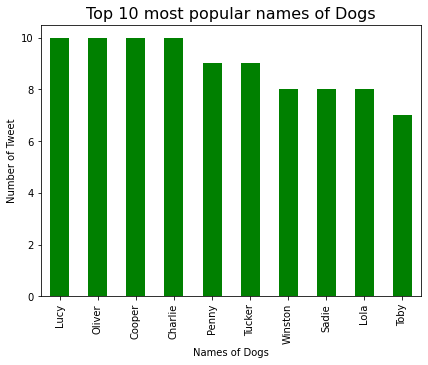

In [98]:
plt.subplot(1,2,1)
names.plot(kind='bar', color=['green'], figsize=(15,5))
plt.title('Top 10 most popular names of Dogs', fontsize=16)
plt.xlabel('Names of Dogs')
plt.ylabel('Number of Tweet');

### Visualization

In [99]:
sources = werate_dogs['source'].value_counts()

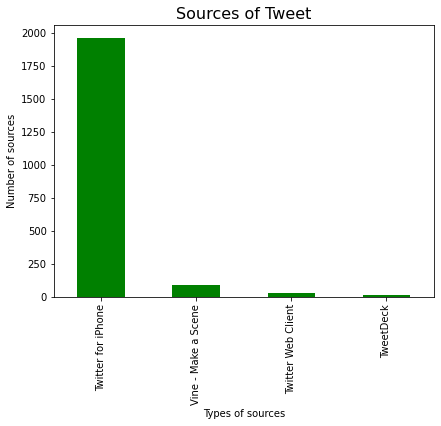

In [100]:
#visualizing the sources of tweet
plt.subplot(1,2,1)
sources.plot(kind='bar', color=['green'], figsize=(15,5))
plt.title('Sources of Tweet', fontsize=16)
plt.xlabel('Types of sources')
plt.ylabel('Number of sources');

### Conclusions:
1. The retweet count and favorite count are highly correlated
2. From the graph plotted the dog breed Golden Retriever is the dog mentioned in most tweets and also has the highest numbers of likes. This could mean Humans loves the Golden retriever more than other breed of dogs since it is the most talked about dog amongst other dogs. 

3. Iphone is the highest source of tweet and also the most used Phone to tweet

4. The dog stage with the highest ratings is the Pupper which is the smallest dog according to [The Dogtionary](https://www.amazon.com/WeRateDogs-Most-Hilarious-Adorable-Youve/dp/1510717145). Considering how small it is and most humans tend to percieve something small as cute that could be what led to the Pupper stage having the highest ratings.
5. They were four names which are most commonly used to name dogs by twitter users which are: Lucy, Oliver, Cooper and Charlie